In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
head_brain_data = pd.read_csv('datasets/headbrain.csv')

head_brain_data.head(10)

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
5,1,1,3585,1300
6,1,1,3785,1400
7,1,1,3559,1255
8,1,1,3613,1355
9,1,1,3982,1375


In [5]:
head_brain_data.shape

(237, 4)

In [6]:
head_brain_data.columns

Index(['Gender', 'Age Range', 'Head Size(cm^3)', 'Brain Weight(grams)'], dtype='object')

In [7]:
HEAD_SIZE = 'Head Size(cm^3)'

BRAIN_WEIGHT = 'Brain Weight(grams)'

In [9]:
X = head_brain_data[[HEAD_SIZE, BRAIN_WEIGHT]]

X.sample(10)

,Head Size(cm^3),Brain Weight(grams)
51,3793,1350
144,3903,1334
167,3358,1190
59,3669,1222
91,3318,1192
66,3415,1310
39,3492,1250
35,3814,1207
217,3170,1178
156,3279,1265


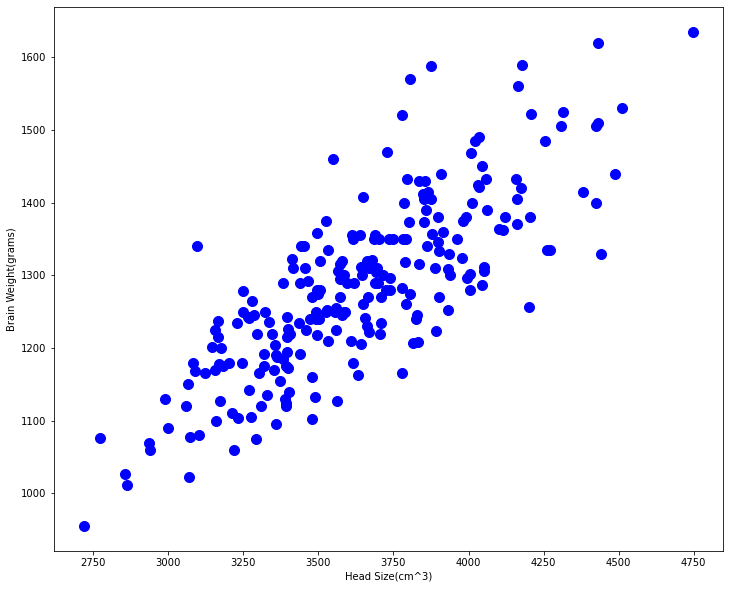

In [10]:
plt.figure(figsize=(12, 10))

plt.scatter(X[HEAD_SIZE], X[BRAIN_WEIGHT], s=100, color='blue')

plt.ylabel('Brain Weight(grams)')
plt.xlabel('Head Size(cm^3)')

plt.show()

In [11]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(support_fraction=None, contamination=0.1)

In [12]:
y_pred = ee.fit_predict(X)

y_pred

array([-1,  1, -1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,  1,  1,
       -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [13]:
n_outliers = (y_pred == -1).sum()
n_outliers

24

In [14]:
xx, yy = np.meshgrid(np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
                    np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500))

z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


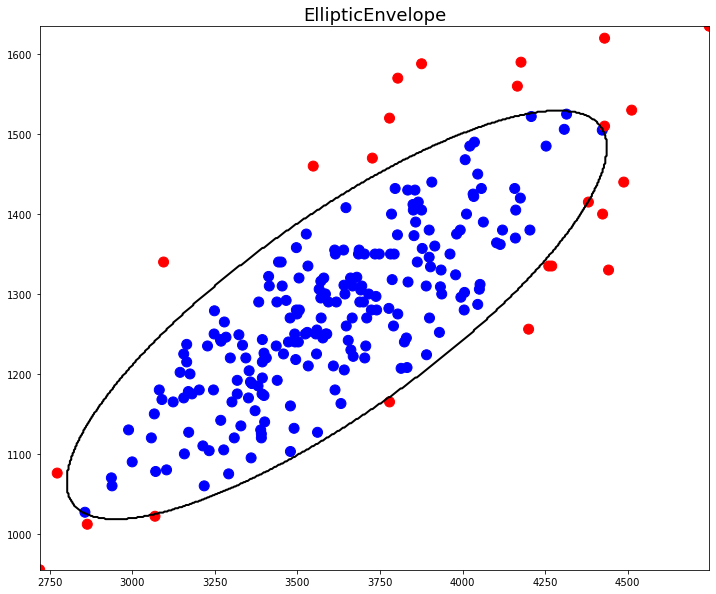

In [16]:
plt.figure(figsize=(12, 10))

plt.title('EllipticEnvelope', size=18)

colors = np.array(['r', 'b'])

plt.scatter(X[HEAD_SIZE],
           X[BRAIN_WEIGHT],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='black')

plt.show()

In [20]:
from sklearn.ensemble import IsolationForest

isf = IsolationForest(contamination=0.08)

In [21]:
y_pred = isf.fit_predict(X)

y_pred

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([-1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [22]:
n_outliers = (y_pred == -1).sum()
n_outliers

19

In [23]:
xx, yy = np.meshgrid(np.linspace(X[HEAD_SIZE].min(), X[HEAD_SIZE].max(), 500),
                    np.linspace(X[BRAIN_WEIGHT].min(), X[BRAIN_WEIGHT].max(), 500))

Z = ee.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\kendr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but EllipticEnvelope was fitted with feature names
  warnings.warn(


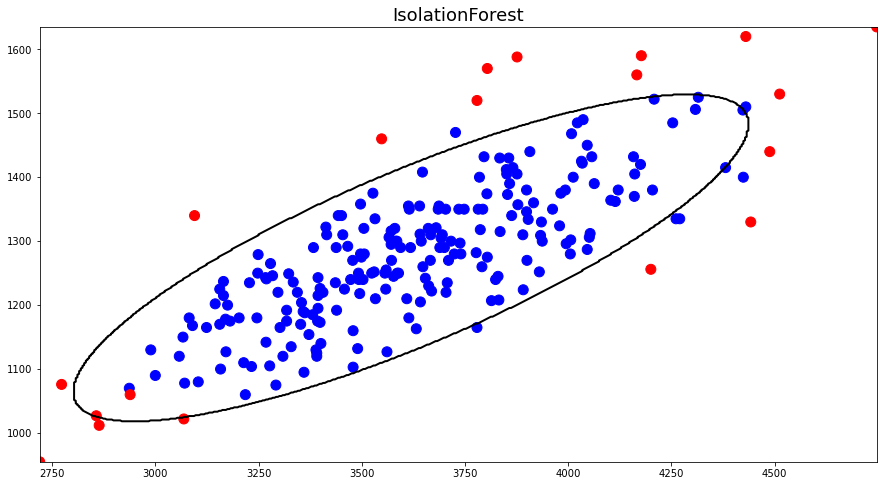

In [24]:
plt.figure(figsize=(15, 8))

plt.title('IsolationForest', size=18)

plt.scatter(X[HEAD_SIZE],
           X[BRAIN_WEIGHT],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='black')

plt.show()

In [25]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor(n_neighbors=15, contamination='auto')

In [26]:
y_pred = lof.fit_predict(X)

y_pred

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1

In [27]:
n_outliers = (y_pred == -1).sum()
n_outliers

12

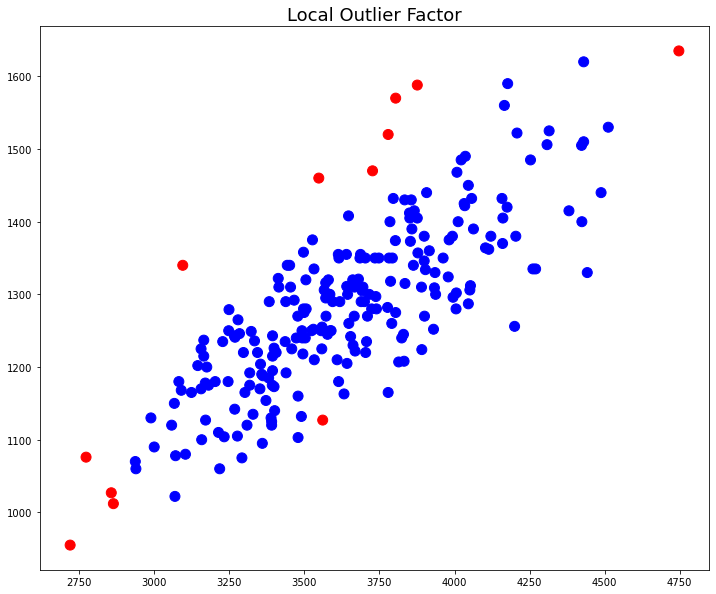

In [28]:
plt.figure(figsize=(12, 10))

plt.title('Local Outlier Factor', size=18)

plt.scatter(X[HEAD_SIZE],
           X[BRAIN_WEIGHT],
           s=100,
           color=colors[(y_pred + 1) // 2])

plt.show()